# Exploratory Data Analysis
### A Templet to get the work done easily
- Understanding Data -> Cleaning Data -> Analysing Data

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder

# understanding the data

def load_data(file_path):
    # Check the file extension to determine the file type
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
        print("Successfully loaded CSV file.")
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
        print("Successfully loaded Excel file.")
    else:
        raise ValueError("Unsupported file format. Only CSV and Excel (XLSX) files are supported.")
    return data


def display_basic_info(data):
    data = pd.DataFrame(data)
    
    display(Markdown("### Head of the dataset:"))
    display(data.head())
    
    display(Markdown("### Tail of the dataset:"))
    display(data.tail())

    display(Markdown("### Summary statistics:"))
    display(data.describe())

    display(Markdown("### Info about the dataset:"))
    display(data.info())
    
    display(Markdown("### Dimensions of the dataset:"))
    display(data.shape)
    
    display(Markdown("### Columns of the dataset:"))
    display(data.columns)
    
    display(Markdown("### Unique Values count:"))
    display(data.nunique())

    # Example for displaying unique values of a specific column (e.g., "gender")
    # display(Markdown("###Unique values of the 'gender' column:"))
    # display(data["gender"].unique())

# cleaning Data
    
def handle_missing_values(data):
    # Check for missing values
    missing_values = data.isnull().sum()
    
    if missing_values.sum() > 0:
        display(Markdown("### Columns with missing values:"))
        print(missing_values[missing_values > 0])
    else:
        print("no missing value found")
        
        

def drop_unwanted_column(column):  
    if(column != ''):
        data = data.drop([column], axis=1)
    else:
        print("Specify the column")
    
    
# understanding DAta


def visualize_correlation_matrix(data):
    # Select only numeric columns for correlation analysis
    numeric_data = data.select_dtypes(include=[np.number])

    # Check if there are any numeric columns
    if numeric_data.shape[1] == 0:
        print("No numeric columns for correlation analysis.")
        return

    # Plot a heatmap of the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

def visualize_feature_relationships(data, column1, column2):
    # Encode categorical columns to numerical values
    label_encoder = LabelEncoder()
    print(data.columns)

    # Check if the specified columns are present before proceeding
    if column1 in data.columns and column2 in data.columns:
        encoded_data = data[[column1, column2]].apply(label_encoder.fit_transform)
        sns.pairplot(encoded_data)
        plt.show()
    else:
        print(f"'{column1}' and '{column2}' columns not found in the dataset.")
    
def visualize_relplot(dataset):
    try:
        # Plot replot for selected features
        sns.catplot(x='variable', y='value', hue='variable', data=dataset, kind='swarm', height=6, aspect=2)
        plt.show()
    except Exception as e:
        print(f"Error occurred while plotting catplot: {e}")
        print("Check if the specified columns 'variable', 'value', and 'hue' are present in the dataset.")


def distributed_or_count_plot(data, col):
    if pd.api.types.is_numeric_dtype(data[col]):
        display(Markdown("### Got Numerical Data, plotting Distributed Plot:"))
        sns.histplot(data[col], bins=10, kde=True)
        plt.title("Numeric Distribution Plot")
    else:
        display(Markdown("### Got Non Numerical Data, plotting Numeric Count Plot"))
        sns.countplot(x=col, data=data)
        plt.title("Count Plot for Categorical Data")
    
    plt.show()
    
def visualize_numerical_distribution(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns
    if len(numerical_features) > 0:
        print("Numerical Features:", numerical_features)
    else:
        print("No numerical feature found")
    
    for feature in numerical_features:
        print(f"\nProcessing feature: {feature}")
        try:
            plt.figure(figsize=(8, 5))
            sns.histplot(data[feature].astype(float), bins=30, kde=True)
            plt.title(f'Distribution of {feature}')
            plt.show()
        except ValueError as e:
            print(f"Error plotting {feature}: {e}")


        
print("Funtion Initialization Done")        

Funtion Initialization Done


### Understanding Data

In [154]:
file_path = 'data.xlsx'
dataset = load_data(file_path)

Successfully loaded Excel file.


In [155]:
display_basic_info(dataset)  

### Head of the dataset:

,Scenario,Answer
0,You are traveling to Paris for the first time....,Visit the Eiffel Tower.
1,You are planning a trip to Russia. What is one...,The Red Square in Moscow.
2,You are an aspiring mountaineer. What is your ...,Mount Everest.
3,You are trying to decide which social media pl...,Facebook.
4,You are learning to code. What is the most rec...,Python.


### Tail of the dataset:

,Scenario,Answer
5,You are looking for a cloud computing solution...,Infrastructure as a Service (IaaS).
6,You are a gamer looking for the most popular v...,Grand Theft Auto V.
7,You are interested in sports. What is the most...,Football (soccer).
8,You are curious about the universe. What is th...,Hydrogen.
9,You are looking for a classic book to read. Wh...,Don Quixote.


### Summary statistics:

,Scenario,Answer
count,10,10
unique,10,10
top,You are traveling to Paris for the first time....,Visit the Eiffel Tower.
freq,1,1


### Info about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Scenario  10 non-null     object
 1   Answer    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


None

### Dimensions of the dataset:

(10, 2)

### Columns of the dataset:

Index(['Scenario', 'Answer'], dtype='object')

### Unique Values count:

Scenario    10
Answer      10
dtype: int64

### Cleaning missing values

In [156]:
handle_missing_values(dataset)

no missing value found


In [157]:
column =''
drop_unwanted_column(column) 

Specify the column


### Understanding Data

In [163]:
visualize_relplot(dataset)

# Set these parameters above in the function definition
# x: The variable to be plotted on the x-axis. In this example, it's set to 'variable', 
# so the x-axis will likely represent different categories or levels of the 'variable' 
# column in the dataset

# y: The variable to be plotted on the y-axis. In this example, it's set to 'value', 
# so the y-axis will represent the values associated with each category or level of 
# the 'variable' column.

# hue: This parameter is used to color the points based on another variable. 
# In this example, it's also set to 'variable', so different categories or 
# levels of the 'variable' column will be differentiated by color.

Error occurred while plotting catplot: Could not interpret value `variable` for parameter `x`
Check if the specified columns 'variable', 'value', and 'hue' are present in the dataset.


### Got Non Numerical Data, plotting Numeric Count Plot

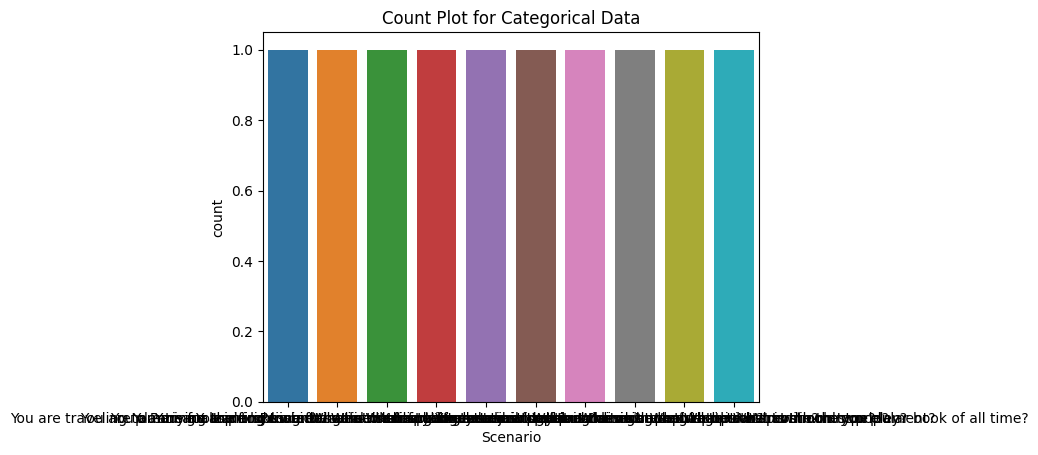

In [164]:
distributed_or_count_plot(dataset, 'Scenario')

In [165]:
visualize_numerical_distribution(dataset)

No numerical feature found


Index(['Scenario', 'Answer'], dtype='object')


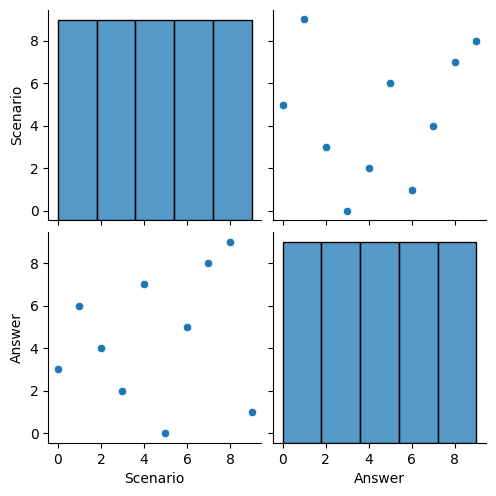

In [166]:
visualize_feature_relationships(dataset, 'Scenario', 'Answer')

In [167]:
visualize_correlation_matrix(dataset)

No numeric columns for correlation analysis.
